This project was to get a list of existing wework locations in london and plot those against 
average house prices in the area as to predict which of the exsting locations would prove he best investment 
for WeLive product, which offers dwellings. The reasoning ehind it being, with the property values rising when wework is 
paying legacy rent rates, pricing for WeLive would be the most favourable. The assumption is the areas that have seen the largest value spike in the last 20 years would likely continue to do so in foreseeable future.


In [2]:
# requests for fetching html of website
import requests

# Make the request to a url
r = requests.get('https://www.wework.com/l/london')

# Create soup from content of request
c = r.content

from bs4 import BeautifulSoup

soup = BeautifulSoup(c)

C:\Users\akostrzewa\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\akostrzewa\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
#panic install bits and bobs I had issues with previously
!pip install mpl_toolkits

!pip install msgpack-python

!python -m pip install wordcloud-1.4.1-cp37-cp37m-win_amd64

!pip install plotly

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement wordcloud-1.4.1-cp37-cp37m-win_amd64 (from versions: )
No matching distribution found for wordcloud-1.4.1-cp37-cp37m-win_amd64
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
#import bonanza in case I need any of the below, likely overkill

import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [5]:
#Scrape wework London locations off the website

ww_london = soup.find_all('div', attrs = {'class':"Text-eRQrfc bZlMnY", 'type':"copy3"})
ww_london

[<div class="Text-eRQrfc bZlMnY" type="copy3">8 Devonshire Square London EC2M 4PL</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">125 Kingsway London WC2B 6NH</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">145 City Rd Hoxton London EC1V</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">10 Devonshire Square London EC2M 4YP</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">207 Old Street London EC1V 9NR</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">1 Poultry London EC2R 8EJ</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">51 Eastcheap London EC3M</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">2 Southbank Place London SE1 7NW</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">70 Wilson Street London EC2A 2DB</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">97 Hackney Rd London E2 8ET</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">The Hewitt, Shoreditch London EC2A</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">1 Waterhouse Square London 

In [6]:
#make more legible

for location in ww_london:
    print(location.prettify())

<div class="Text-eRQrfc bZlMnY" type="copy3">
 8 Devonshire Square London EC2M 4PL
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 125 Kingsway London WC2B 6NH
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 145 City Rd Hoxton London EC1V
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 10 Devonshire Square London EC2M 4YP
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 207 Old Street London EC1V 9NR
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 1 Poultry London EC2R 8EJ
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 51 Eastcheap London EC3M
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 2 Southbank Place London SE1 7NW
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 70 Wilson Street London EC2A 2DB
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 97 Hackney Rd London E2 8ET
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 The Hewitt, Shoreditch London EC2A
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 1 Wa

In [7]:
#bye-bye div tags

addresses = []
for location in ww_london:
    locations = location.contents[0]
    
    addresses.append(locations)
    print(locations)

8 Devonshire Square London EC2M 4PL
125 Kingsway London WC2B 6NH
145 City Rd Hoxton London EC1V
10 Devonshire Square London EC2M 4YP
207 Old Street London EC1V 9NR
1 Poultry London EC2R 8EJ
51 Eastcheap London EC3M
2 Southbank Place London SE1 7NW
70 Wilson Street London EC2A 2DB
97 Hackney Rd London E2 8ET
The Hewitt, Shoreditch London EC2A
1 Waterhouse Square London EC1N 2ST
120 Moorgate London EC2Y 9AL
The Bard, Shoreditch London EC2A 3EN
115 Mare Street London UK E8 4RU
12 Hammersmith Grove London W6 7AP
41 Corsham Street London N1 6DR
131 Finsbury Pavement London EC2A 1NT
1 Primrose Street London EC2A 2EX
14 Gray's Inn Road London WC1X 8HN
30 Stamford Street London SE1 9PY
2 Sheraton St London W1F 8BH
Aldgate Tower 2 Leman Street London E1 8FA
119 Marylebone Road London NW1 5PU
1 St. Katharine's Way London E1W 1UN
9 Devonshire Square 3rd Floor London EC2M 4YD
Shepherds Bush Road London W6 7NL
16 Great Chapel St London W1F 8FL
38 Chancery Lane London WC2A 1EN
2 Eastbourne Terrace L

In [8]:
#correct some of the postcodes - PLEASE NOTE: the list sequence changes daily or more often 
#the numbers used to call list elements below might have to be adjusted

addresses[2]='145 City Rd Hoxton London EC1V 1LP'
addresses[6]='51 Eastcheap London EC3M 1JP'
addresses[11]= 'The Hewitt, Shoreditch London EC2A 3EN'

In [9]:
addresses

['8 Devonshire Square London EC2M 4PL',
 '125 Kingsway London WC2B 6NH',
 '145 City Rd Hoxton London EC1V 1LP',
 '10 Devonshire Square London EC2M 4YP',
 '207 Old Street London EC1V 9NR',
 '1 Poultry London EC2R 8EJ',
 '51 Eastcheap London EC3M 1JP',
 '2 Southbank Place London SE1 7NW',
 '70 Wilson Street London EC2A 2DB',
 '97 Hackney Rd London E2 8ET',
 'The Hewitt, Shoreditch London EC2A',
 'The Hewitt, Shoreditch London EC2A 3EN',
 '120 Moorgate London EC2Y 9AL',
 'The Bard, Shoreditch London EC2A 3EN',
 '115 Mare Street London UK E8 4RU',
 '12 Hammersmith Grove London W6 7AP',
 '41 Corsham Street London N1 6DR',
 '131 Finsbury Pavement London EC2A 1NT',
 '1 Primrose Street London EC2A 2EX',
 "14 Gray's Inn Road London WC1X 8HN",
 '30 Stamford Street London SE1 9PY',
 '2 Sheraton St London W1F 8BH',
 'Aldgate Tower 2 Leman Street London E1 8FA',
 '119 Marylebone Road London NW1 5PU',
 "1 St. Katharine's Way London E1W 1UN",
 '9 Devonshire Square 3rd Floor London EC2M 4YD',
 'Shephe

In [10]:
#extract just postcodes

london_postcodes=[]
for a in addresses:
    london_postcodes.append(a[-8:-4])

In [11]:
london_postcodes

['EC2M',
 'WC2B',
 'EC1V',
 'EC2M',
 'EC1V',
 'EC2R',
 'EC3M',
 ' SE1',
 'EC2A',
 'n E2',
 'don ',
 'EC2A',
 'EC2Y',
 'EC2A',
 'K E8',
 'n W6',
 'n N1',
 'EC2A',
 'EC2A',
 'WC1X',
 ' SE1',
 ' W1F',
 'n E1',
 ' NW1',
 ' E1W',
 'EC2M',
 'n W6',
 ' W1F',
 'WC2A',
 'n W2',
 'EC2N',
 'EC1N',
 'EC2Y',
 ' SE1',
 'EC4R',
 'WC2B',
 'EC2A',
 'n N1']

In [12]:
#remove spaces

from re import sub

districts = []

for postcode in london_postcodes:
    print(sub(r'\s+','', string=postcode))
    districts.append(sub(r'\s+','', string=postcode))

      

EC2M
WC2B
EC1V
EC2M
EC1V
EC2R
EC3M
SE1
EC2A
nE2
don
EC2A
EC2Y
EC2A
KE8
nW6
nN1
EC2A
EC2A
WC1X
SE1
W1F
nE1
NW1
E1W
EC2M
nW6
W1F
WC2A
nW2
EC2N
EC1N
EC2Y
SE1
EC4R
WC2B
EC2A
nN1


In [13]:
districts

['EC2M',
 'WC2B',
 'EC1V',
 'EC2M',
 'EC1V',
 'EC2R',
 'EC3M',
 'SE1',
 'EC2A',
 'nE2',
 'don',
 'EC2A',
 'EC2Y',
 'EC2A',
 'KE8',
 'nW6',
 'nN1',
 'EC2A',
 'EC2A',
 'WC1X',
 'SE1',
 'W1F',
 'nE1',
 'NW1',
 'E1W',
 'EC2M',
 'nW6',
 'W1F',
 'WC2A',
 'nW2',
 'EC2N',
 'EC1N',
 'EC2Y',
 'SE1',
 'EC4R',
 'WC2B',
 'EC2A',
 'nN1']

In [14]:
#remove lowercase letters

p_d = []

for district in districts:
    print(sub(r'[a-z]','', string=district))
    p_d.append(sub(r'[a-z]','', string=district))
    


EC2M
WC2B
EC1V
EC2M
EC1V
EC2R
EC3M
SE1
EC2A
E2

EC2A
EC2Y
EC2A
KE8
W6
N1
EC2A
EC2A
WC1X
SE1
W1F
E1
NW1
E1W
EC2M
W6
W1F
WC2A
W2
EC2N
EC1N
EC2Y
SE1
EC4R
WC2B
EC2A
N1


In [15]:
p_d

['EC2M',
 'WC2B',
 'EC1V',
 'EC2M',
 'EC1V',
 'EC2R',
 'EC3M',
 'SE1',
 'EC2A',
 'E2',
 '',
 'EC2A',
 'EC2Y',
 'EC2A',
 'KE8',
 'W6',
 'N1',
 'EC2A',
 'EC2A',
 'WC1X',
 'SE1',
 'W1F',
 'E1',
 'NW1',
 'E1W',
 'EC2M',
 'W6',
 'W1F',
 'WC2A',
 'W2',
 'EC2N',
 'EC1N',
 'EC2Y',
 'SE1',
 'EC4R',
 'WC2B',
 'EC2A',
 'N1']

In [16]:
#put list in df

postcodes_ww=pd.DataFrame(p_d)
postcodes_ww.columns=['Postcode']

postcodes_ww

,Postcode
0,EC2M
1,WC2B
2,EC1V
3,EC2M
4,EC1V
5,EC2R
6,EC3M
7,SE1
8,EC2A
9,E2


In [17]:
#second list into df

ww_add = pd.DataFrame(addresses)
ww_add.columns=['Address']
ww_add

,Address
0,8 Devonshire Square London EC2M 4PL
1,125 Kingsway London WC2B 6NH
2,145 City Rd Hoxton London EC1V 1LP
3,10 Devonshire Square London EC2M 4YP
4,207 Old Street London EC1V 9NR
5,1 Poultry London EC2R 8EJ
6,51 Eastcheap London EC3M 1JP
7,2 Southbank Place London SE1 7NW
8,70 Wilson Street London EC2A 2DB
9,97 Hackney Rd London E2 8ET


In [18]:
london_addresses = pd.merge(ww_add, postcodes_ww, left_index=True, right_index=True)

In [19]:
london_addresses.rename(columns={'0':'Postcode'})

london_addresses

,Address,Postcode
0,8 Devonshire Square London EC2M 4PL,EC2M
1,125 Kingsway London WC2B 6NH,WC2B
2,145 City Rd Hoxton London EC1V 1LP,EC1V
3,10 Devonshire Square London EC2M 4YP,EC2M
4,207 Old Street London EC1V 9NR,EC1V
5,1 Poultry London EC2R 8EJ,EC2R
6,51 Eastcheap London EC3M 1JP,EC3M
7,2 Southbank Place London SE1 7NW,SE1
8,70 Wilson Street London EC2A 2DB,EC2A
9,97 Hackney Rd London E2 8ET,E2


In [20]:
#check number of unique values

london_addresses.nunique()

Address     38
Postcode    23
dtype: int64

In [124]:
#import land registry info from HM Land Registry open data

housing=pd.read_csv('land-registry-house-prices-postcode-district.csv')
housing.head()

,Postcode_District,Year,Measure,Value
0,BR1,1995,Median,75458.0
1,BR2,1995,Median,86258.0
2,BR3,1995,Median,77983.0
3,BR4,1995,Median,93816.0
4,BR5,1995,Median,71218.0


In [22]:
#selecting rows with Median values

housing=housing[housing['Measure'].str.match('Median')]

In [23]:
#joining dwo dataframes for the ultimate df

housing_joined = pd.merge(housing,london_addresses, left_on='Postcode_District', right_on='Postcode')

In [125]:
#boom

housing_joined.head()

,Postcode_District,Year,Measure,Value,Address,Postcode
0,E1,1995,Median,62887.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
1,E1,1996,Median,65937.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
2,E1,1997,Median,87052.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
3,E1,1998,Median,106521.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
4,E1,1999,Median,126915.0,Aldgate Tower 2 Leman Street London E1 8FA,E1


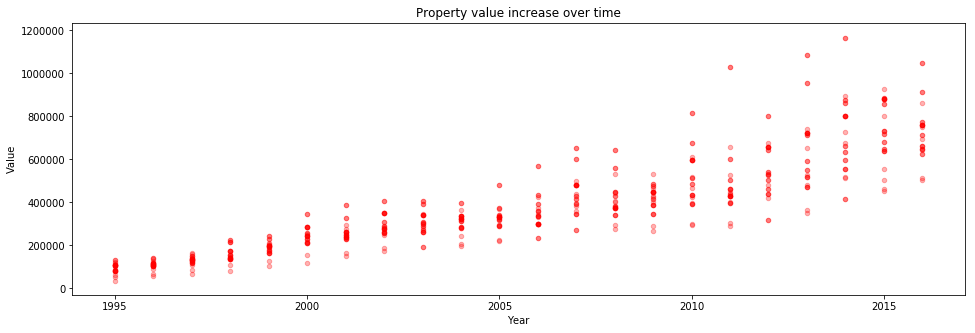

In [130]:
#groupby and plot value trend

fig, ax = plt.subplots()
year_and_value=housing_joined.groupby('Address').plot(x='Year', y='Value', title='Property value increase over time', kind='scatter',color='r',alpha=0.3, figsize=(16,5),  ax=ax,)

In [38]:
#simplify the variables

a=housing_joined.groupby('Address').min().reset_index()
b=housing_joined.groupby('Address').max().reset_index()

In [40]:
#simplify variables again to avoid confusion

value_low=a['Value']
value_high=b['Value']


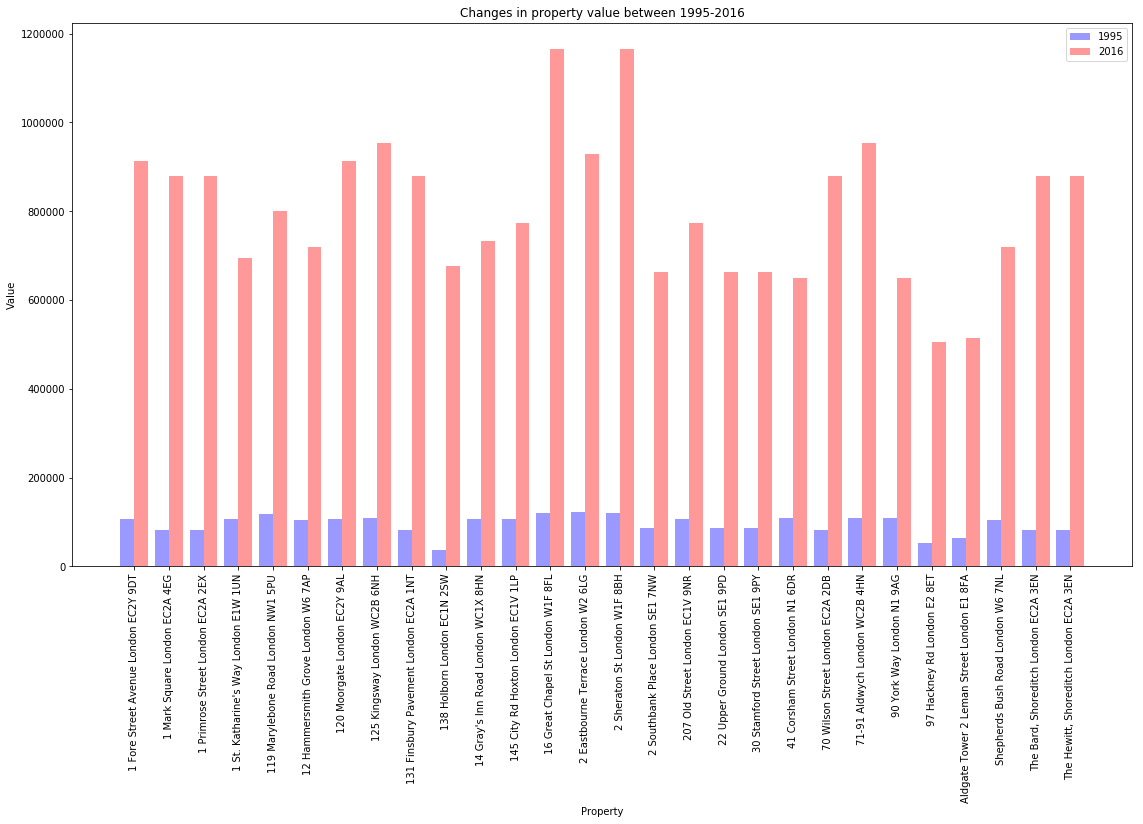

In [119]:
#Compare the property values in 1995 and 2016

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple



fig, ax = plt.subplots(figsize=(19,10))
index = np.arange(len(a['Address']))


bar_width = 0.4

opacity = 0.4


rects1 = ax.bar( index,value_low, bar_width,
                alpha=opacity, color='b',align='center',
                label='1995')

rects2 = ax.bar( index+bar_width,value_high, bar_width,
                alpha=opacity, color='r',align='center',
                label='2016')

ax.set_xlabel('Property')
ax.set_ylabel('Value')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(a['Address'], rotation=90)

ax.set_title('Changes in property value between 1995-2016')
ax.legend()


plt.show()

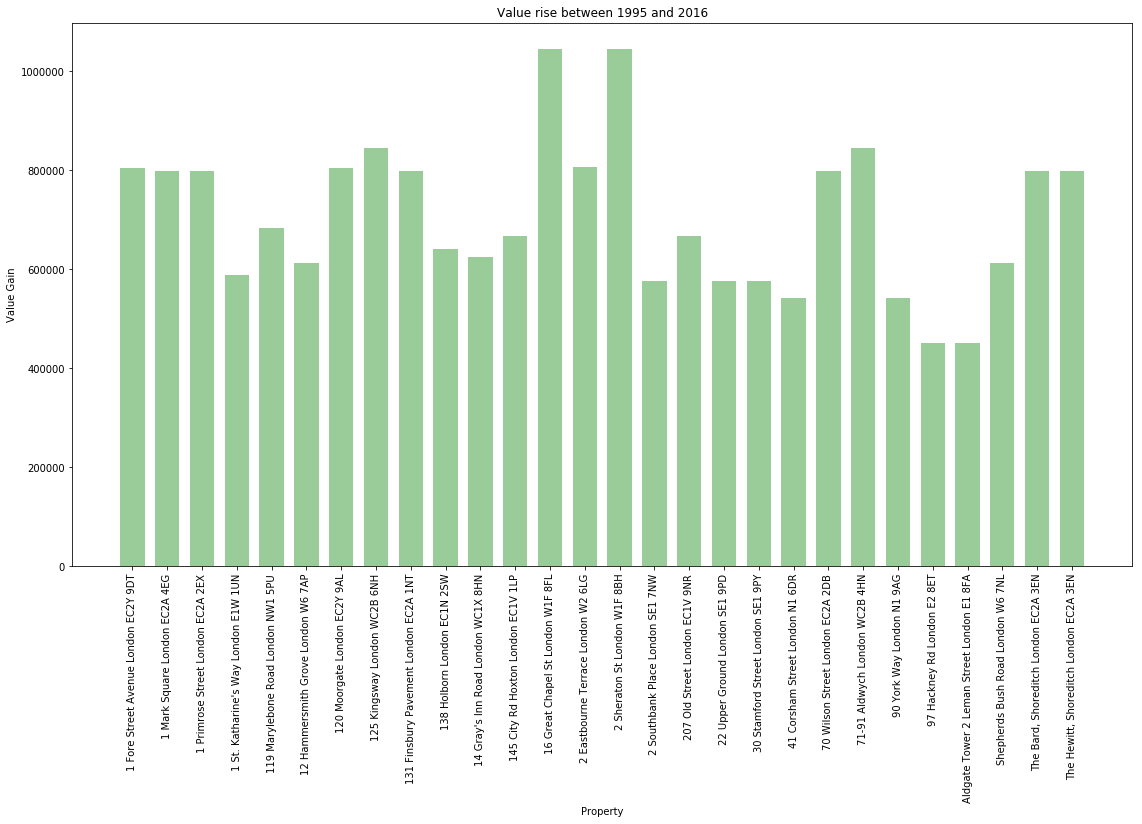

In [118]:
#delta Value, representing properies in areas where they gained the most

fig, ax = plt.subplots(figsize=(19,10))
index = np.arange(len(a['Address']))


bar_width = 0.7

opacity = 0.4

rects1 = ax.bar( index,(value_high-value_low), bar_width,
                alpha=opacity, color='g',align='center')

ax.set_xlabel('Property')
ax.set_ylabel('Value Gain')
ax.set_xticks(index)
ax.set_xticklabels(a['Address'], rotation=90)

ax.set_title('Value rise between 1995 and 2016')
ax.legend()


plt.show()

In [90]:
import plotly 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sys
sys.setrecursionlimit(3000)

trace0 = go.Bar(
    x= a['Address'],
    y=value_low,
    name='2016',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=a['Address'],
    y=value_high,
    name='2014',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='angled-text-bar')

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x000001F22EB30D50> returned a result with an error set

In [ ]:
import plotly 

plotly.offline.init_notebook_mode(connected=True)

trace0 = {'type' : 'bar', 'x': b['Address'], 'y' :a['Value']}

plotly.offline.iplot([trace0])

In [ ]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print (cf.__version__)

In [ ]:
#plotly doesn't seem to work still

#import cufflinks as cf

#df= housing_joined.groupby('Address').max().reset_index().iplot(kind='scatter', filename='cufflinks/cf-simple-line')

#df.iplot(kind='scatter', filename='cufflinks/cf-simple-line')

The result of the project isn't conclusive as I am missing data on current rents wework is paying on these properties and there is no guarantee what will happen to the market as Brexit happens. Unfortunately I ran out of time to produce quality visualisations for this project, especially since whatever I do, plotly just won't do what I want it to do (work). There's possibly better/simpler ways of cleaning the data I imported.